In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
ds = pd.read_csv('glass.csv')

In [3]:
y = ds['Type'] - 1
m = len(y)
X = ds.drop('Type', axis=1)

In [4]:
# normalize data
X = [[(X.iloc[i, j]-X.iloc[:, j].mean())/(X.iloc[:, j].max()-X.iloc[:, j].min()) for j in range(len(X.iloc[i]))] for i in range(m)]
X = np.array(X, dtype=np.float64)

In [5]:
# one hot encoding
labels = np.zeros((m, 7))
for i in range(m):
    labels[i, y.iloc[i]] = 1

In [6]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))

In [7]:
def sigmoid_der(z):
    return sigmoid(z) * (1 - sigmoid(z))

In [8]:
def softmax(z):
    expZ = np.exp(z)
    return expZ / expZ.sum(axis=1, keepdims=True)

In [9]:
def cost_function(labels, res):
    return np.sum(-labels * np.log(res))

In [10]:
hidden_layers = 10
labels_count = 7
lr = 0.01
iterations = 25000
j_history = np.array([0 for _ in range(iterations)], dtype=np.float32)

In [11]:
w1 = np.random.rand(X.shape[1], hidden_layers)
b1 = np.random.rand(hidden_layers)

In [12]:
w2 = np.random.rand(hidden_layers, labels_count)
b2 = np.random.rand(labels_count)

In [13]:
for i in range(iterations):
    # feed forward
    zh = np.dot(X, w1) + b1
    layerh = sigmoid(zh)
    layer0 = softmax(np.dot(layerh, w2) + b2)
    
    # back propagation
    tmp = layer0 - labels
    tmp1 = np.dot(tmp, w2.T)
    
    w2 -= np.dot(layerh.T, tmp) * lr
    w1 -= np.dot(X.T, sigmoid(zh) * tmp1) * lr
    
    b2 -= tmp.sum(axis=0) * lr
    b1 -= (tmp1 * sigmoid(zh)).sum(axis=0) * lr
    
    j_history[i] = cost_function(labels, layer0)

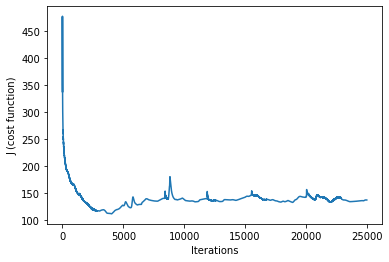

In [14]:
plt.plot(np.arange(0, iterations), j_history)
plt.ylabel('J (cost function)')
plt.xlabel('Iterations')
plt.show()

In [15]:
# feed forward
zh = np.dot(X, w1) + b1
layerh = sigmoid(zh)
layer0 = softmax(np.dot(layerh, w2) + b2)

In [16]:
print(w1, w2)

[[-218.4271708  -593.09956181  221.36542869 -104.00925996  -22.53400992
   157.25275204  -47.06297172 -159.18197903  139.03743863 -210.60325184]
 [-119.21364332   82.07037245   46.63927777    2.12765788   22.8343022
  -419.30358466  720.81902322  290.58049045 -459.83438773   -5.5500903 ]
 [ -76.2210679   203.52363429  104.59099751 -239.11249594  181.2206369
  -116.44724023 -273.06637862 -210.59256541  -99.67463857  367.06899116]
 [ 363.16054563 -414.41361384  -60.19855433  201.87440487 -119.17560895
   298.04685683  108.73522616  289.70163895  144.15932364  316.50202738]
 [-257.65294975  -59.94067539   -4.89148731   -4.53839059  119.87945048
  -458.3667878    57.50684843  -75.59713836 -252.65355098 -221.52157972]
 [ 277.43798906 -360.05921465   28.74434435  169.33027117  -99.23475974
   382.85157041 -421.21114476  -14.12388313  301.11829702  138.18434614]
 [ -35.28872616  268.7408427   -52.45621056 -104.82107922   29.37804564
   209.54188721  -74.94304372 -126.63098801  247.32034849 -2

In [17]:
result = np.argmax(layer0, axis = 1)
print(np.mean(result == y) * 100)

73.36448598130842
